# Центральная предельная теорема своими руками

Импортируем необходимые библиотеки:

In [108]:
import numpy as np
from scipy.stats import laplace, norm
import matplotlib.pyplot as plt
%matplotlib inline

Распределение Лапласа задается плотностью вероятности:

$$f_{Laplace}(x) = \frac{\alpha}{2} \cdot e^{-\alpha|x - \beta|}, \  -\infty < x < +\infty $$
 
$$ \alpha > 0 $$

$$ -\infty < \beta < +\infty $$


Сравним распределение Лапласа с Нормальным:

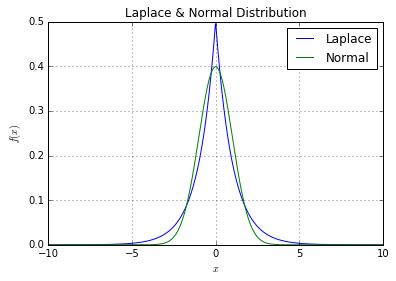

In [109]:
N = 1000
x = np.linspace(-10, 10, N)
plt.plot(x, laplace.pdf(x), label='Laplace')
plt.plot(x, norm.pdf(x), label='Normal')
plt.legend()
plt.title('Laplace & Normal Distribution')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.grid()
plt.show()

Для генерации выборки воспользуемся scipy.stats.laplace

$\alpha$, $beta$ - заданы по умолчанию:
$$ f_{s.s.l}(x) = \frac{1}{2} \cdot e^{-|x|} $$

Медиана (= мат. ож.) и дисперсия в распределении Лапласа:

$$ \mu = E(x) = \beta $$
$$ \sigma^2 = \frac{2}{\alpha^2}$$

Из ЦПТ:

$$ f(x) \sim N(E(x),\ \sigma_N) $$
$$ \sigma_N = \sqrt{\frac{\sigma^2}{n}} $$

Собственно, построение графиков и расчеты:

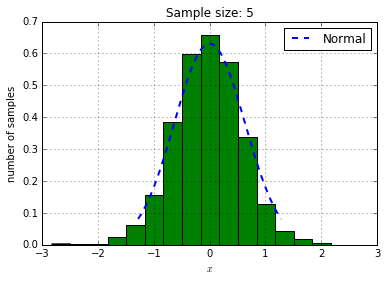

 размер выборки: 5 
 параметры аппроксимации:
	 медиана = 0.000000
	 среднеквадратичное отклонение = 0.632456


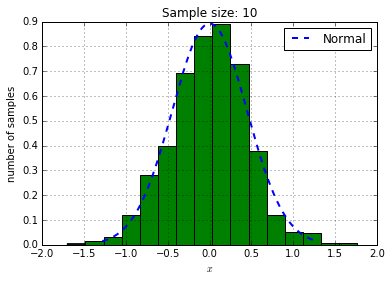

 размер выборки: 10 
 параметры аппроксимации:
	 медиана = 0.000000
	 среднеквадратичное отклонение = 0.447214


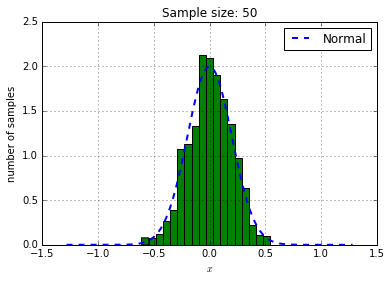

 размер выборки: 50 
 параметры аппроксимации:
	 медиана = 0.000000
	 среднеквадратичное отклонение = 0.200000


In [116]:
p = 15.0
alpha = 1.0 
beta = 0.0

def pltDistribution(n):
    # 'N' раз генерируем выборку размера 'n' и берем выборочные средние:
    avg = [np.mean(laplace.rvs(size=n)) for i in np.arange(N)] 

    x = np.linspace(norm.ppf(0.1), norm.ppf(0.9), N)
    # среднеквадратичное отклонение:
    sigma = np.sqrt(2.0 / (alpha**2 * n)) 
    plt.plot(x, norm.pdf(x, beta, sigma), '--', lw=2.0, label='Normal')
    plt.legend()
    
    plt.hist(avg, bins=p + round(n / p), normed=True)
    plt.title('Sample size: %d' % n)
    plt.xlabel('$x$')
    plt.ylabel('number of samples')
    plt.grid()
    plt.show()
    print " размер выборки: %d \n параметры аппроксимации:\n\t медиана = %f\n\t среднеквадратичное отклонение = %f" % (n, beta, sigma)

take_this_n = [5, 10, 50]
for n in take_this_n: pltDistribution(n)

#### В качестве вывода
можно заметить, что с ростом размера выборки распределение выборочных средних естественным образом стремится к виду, данному плотностью вероятности. Кроме того, так как распределение Лапласа симметрично, да и вообще похоже на Нормальное, аппроксимация хороша даже при малых размерах выборки. Тем не менее, качество аппроксимации растет с ростом размера выборки.